# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import torch.optim as optim


# Data voorbereiden

In [40]:
def huisje(huis_nr):
    huis = pd.read_csv(huis_nr, index_col=0)
    huis.index = pd.to_datetime(huis.index, errors='coerce')
    huis['datum'] = huis.index
    huis['perdag_verbruik_st']= huis['perdag_verbruik'].diff()
    huis['maand'] = huis['datum'].dt.strftime('%m')
    huis['dag']= [*range(1, len(huis)+1)]
    huis= huis[['dag', 'maand', 'perdag_verbruik', 'perdag_verbruik_st']].fillna(0)
    huis= huis[:-1]
    return huis

In [41]:
huis1= huisje('df01_perdag')
huis2= huisje('df02_perdag')
huis3= huisje('df03_perdag')
huis4= huisje('df04_perdag')
huis5= huisje('df05_perdag')
huis6= huisje('df06_perdag')
huis7= huisje('df07_perdag')
huis9= huisje('df09_perdag')
huis10= huisje('df010_perdag')
huis11= huisje('df011_perdag')
huis12= huisje('df012_perdag')
huis14= huisje('df014_perdag')
huis15= huisje('df015_perdag')
huis16= huisje('df016_perdag')
huis17= huisje('df017_perdag')
huis19= huisje('df019_perdag')
huis20= huisje('df020_perdag')
huis22= huisje('df022_perdag')
huis23= huisje('df023_perdag')
huis24= huisje('df024_perdag')
huis26= huisje('df026_perdag')
huis28= huisje('df028_perdag')
huis30= huisje('df030_perdag')
huis37= huisje('df037_perdag')
huis38= huisje('df038_perdag')
huis39= huisje('df039_perdag')
huis40= huisje('df040_perdag')
huis41= huisje('df041_perdag')
huis42= huisje('df042_perdag')
huis43= huisje('df043_perdag')
huis44= huisje('df044_perdag')
huis46= huisje('df046_perdag')
huis47= huisje('df047_perdag')
huis48= huisje('df048_perdag')
huis50= huisje('df050_perdag')
huis51= huisje('df01_perdag')
huis52= huisje('df01_perdag')
huis54= huisje('df01_perdag')
huis55= huisje('df01_perdag')
huis56= huisje('df01_perdag')
huis57= huisje('df01_perdag')
huis58= huisje('df058_perdag')
huis60= huisje('df060_perdag')
huis61= huisje('df061_perdag')
huis63= huisje('df063_perdag')
huis64= huisje('df064_perdag')
huis66= huisje('df066_perdag')
huis67= huisje('df067_perdag')
huis69= huisje('df069_perdag')
huis70= huisje('df070_perdag')
huis71= huisje('df071_perdag')
huis72= huisje('df072_perdag')
huis73= huisje('df073_perdag')
huis74= huisje('df074_perdag')
huis75= huisje('df075_perdag')
huis76= huisje('df076_perdag')
huis77= huisje('df077_perdag')
huis79= huisje('df079_perdag')
huis80= huisje('df080_perdag')
huis81= huisje('df081_perdag')
huis83= huisje('df083_perdag')
huis84= huisje('df084_perdag')
huis88= huisje('df088_perdag')
huis91= huisje('df091_perdag')
huis92= huisje('df092_perdag')
huis93= huisje('df093_perdag')
huis94= huisje('df094_perdag')
huis95= huisje('df095_perdag')
huis98= huisje('df098_perdag')
huis99= huisje('df099_perdag')
huis100= huisje('df0100_perdag')
huis102= huisje('df0102_perdag')
huis104= huisje('df0104_perdag')
huis105= huisje('df0105_perdag')
huis106= huisje('df0106_perdag')
huis110= huisje('df0110_perdag')
huis112= huisje('df0112_perdag')
huis113= huisje('df0113_perdag')
huis114= huisje('df0114_perdag')
huis115= huisje('df0115_perdag')
huis116= huisje('df0116_perdag')
huis117= huisje('df0117_perdag')
huis120= huisje('df0120_perdag')

# LSTM, huisje26

In [42]:
huis26

,dag,maand,perdag_verbruik,perdag_verbruik_st
2019-01-01,1,01,9.0395,0.0000
2019-01-02,2,01,9.6430,0.6035
2019-01-03,3,01,13.0820,3.4390
2019-01-04,4,01,13.1460,0.0640
2019-01-05,5,01,12.5870,-0.5590
...,...,...,...,...
2019-12-27,361,12,14.1130,5.0840
2019-12-28,362,12,15.0320,0.9190
2019-12-29,363,12,17.2900,2.2580
2019-12-30,364,12,11.7260,-5.5640


In [254]:
training_set= huis26.iloc[1:, 3].values.reshape(-1,1)

In [262]:
def sliding_window(data, dagen):
    x = []
    y = []

    for i in range(len(data)-dagen):
        _x = data[i:(i+dagen)]
        _y = data[i+dagen]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

dagen = 14
x, y = sliding_window(training_data, dagen)

train_size = int(len(y) * 0.80)
test_size = len(y) - train_size

X = Variable(torch.Tensor(np.array(x)))
y = Variable(torch.Tensor(np.array(y)))

X_train = Variable(torch.Tensor(np.array(x[:train_size])))
y_train = Variable(torch.Tensor(np.array(y[:train_size])))

X_test = Variable(torch.Tensor(np.array(x[train_size:])))
y_test = Variable(torch.Tensor(np.array(y[train_size:])))

In [263]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.dagen = dagen
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        
        return out

In [264]:
num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 50
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = lstm(X_train)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.41344
Epoch: 100, loss: 0.01365
Epoch: 200, loss: 0.01306
Epoch: 300, loss: 0.01166
Epoch: 400, loss: 0.01125
Epoch: 500, loss: 0.01073
Epoch: 600, loss: 0.01112
Epoch: 700, loss: 0.00886
Epoch: 800, loss: 0.00655
Epoch: 900, loss: 0.00538


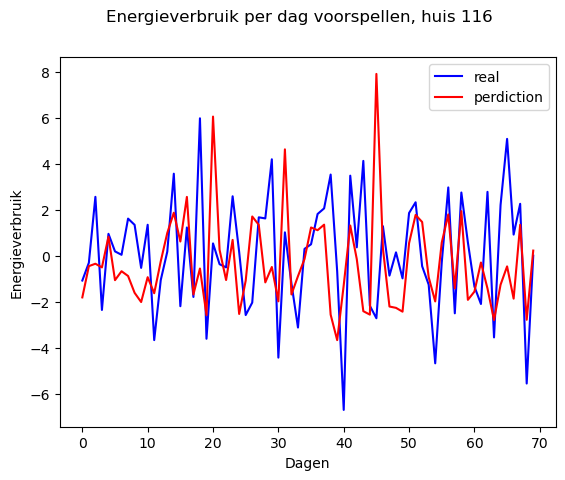

R2_score:  -0.28237153255871283


In [265]:
lstm.eval()
train_predict = lstm(X_test)

data_predict = train_predict.data.numpy()
y_plot = y_test.data.numpy()

data_predict = sc.inverse_transform(data_predict)
y_plot = sc.inverse_transform(y_plot)

plt.plot(y_plot, color='blue', label='real')
plt.plot(data_predict, color='red', label='perdiction')
plt.suptitle('Energieverbruik per dag voorspellen, huis 116')
plt.xlabel('Dagen')
plt.ylabel('Energieverbruik')
plt.legend()
plt.show()
print('R2_score: ', r2_score(y_plot, data_predict))

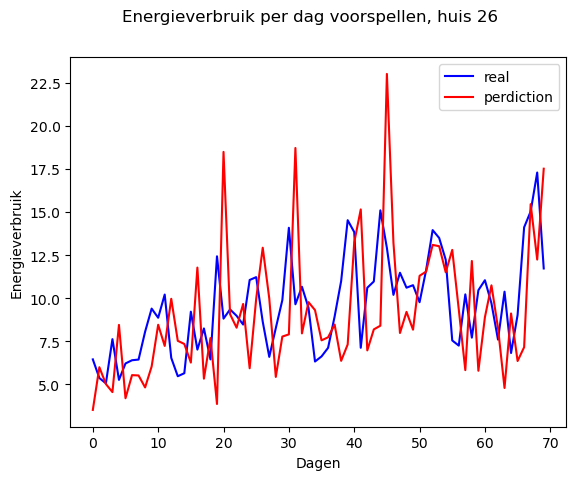

R2_score:  -1.0644884046097083


In [266]:
lstm.eval()
train_predict = lstm(X_test)

data_predict = train_predict.data.numpy()
y_plot = y_test.data.numpy()

data_predict = sc.inverse_transform(data_predict)
y_plot = sc.inverse_transform(y_plot)

real= huis26.iloc[293:-1, 2].values
predicted = []
for previous, pred in zip(real, data_predict):
    predicted.append(previous+pred)

plt.plot(real[1:], color='blue', label='real')
plt.plot(predicted, color='red', label='perdiction')
plt.suptitle('Energieverbruik per dag voorspellen, huis 26')
plt.xlabel('Dagen')
plt.ylabel('Energieverbruik')
plt.legend()
plt.show()
print('R2_score: ', r2_score(real[1:], predicted))

In [195]:
for i,j in zip(data_predict, y_test):
    print("predict:", i, "actual:", j)

predict: [1.2922848] actual: tensor([0.5839])
predict: [0.48118937] actual: tensor([0.6851])
predict: [-1.2098266] actual: tensor([0.6319])
predict: [-0.30423364] actual: tensor([0.6808])
predict: [-1.1350375] actual: tensor([0.5886])
predict: [0.40618846] actual: tensor([0.5888])
predict: [0.40326282] actual: tensor([0.5696])
predict: [0.7097508] actual: tensor([0.6382])
predict: [-0.41035315] actual: tensor([0.5948])
predict: [0.30656934] actual: tensor([0.5234])
predict: [1.4279186] actual: tensor([0.5398])
predict: [1.1767209] actual: tensor([0.8330])
predict: [-3.8729496] actual: tensor([0.6800])
predict: [-1.1202826] actual: tensor([0.7542])
predict: [-2.4315407] actual: tensor([0.7986])
predict: [-3.2378714] actual: tensor([0.8014])
predict: [-3.2897089] actual: tensor([0.4714])
predict: [2.1995168] actual: tensor([0.3059])
predict: [4.3819184] actual: tensor([0.6228])
predict: [-0.15307859] actual: tensor([0.6075])
predict: [0.0994542] actual: tensor([0.6249])
predict: [-0.1870